In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin_slsqp

In [4]:
from ppr.geometry import Rectangle

In [22]:
rec1 = Rectangle(1, 2, 3, 2, 0)
rec2 = Rectangle(2, 5, 2, 4, np.pi/4)

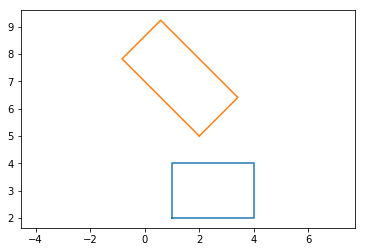

In [23]:
fig, ax = plt.subplots()
rec1.plot(ax)
rec2.plot(ax)
ax.axis('equal')
plt.show()

# General matrix formulation for polyhedra

In [48]:
# euclidean distance between two points
def dist(x, y):
    return np.sqrt(np.sum((x-y)**2))

# point in polyhedra if Ax <= b
def pol_eq(x, A, b):
    return A.dot(x) - b

def is_in_pol(x, A, b):
    return np.all(pol_eq(x, A, b) < 0)

In [55]:
# general representation of rectangles
A1, b1 = rec1.get_matrix_form()
A2, b2 = rec2.get_matrix_form()

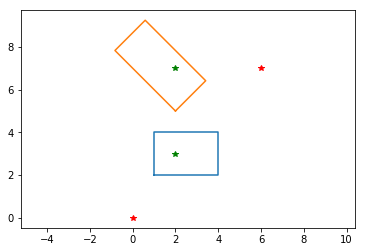

In [54]:
# check some points
some_points = np.array([[0, 0], [2, 3], [2, 7], [6, 7]])

fig, ax = plt.subplots()
rec1.plot(ax)
rec2.plot(ax)
ax.axis('equal')
for p in some_points:
    if is_in_pol(p, A1, b1) or is_in_pol(p, A2, b2):
        ax.plot(p[0], p[1], 'g*')
    else:
        ax.plot(p[0], p[1], 'r*')
plt.show()

# Minumum distance problem formulation

Arrange two point x and y in one vector var = [x, y]

In [68]:
def obj(var):
    return dist(var[0:2], var[2:4])

def inequality_constraints(var):
    ie1 = pol_eq(var[0:2], A1, b1)
    ie2 = pol_eq(var[2:4], A2, b2)
    
    # fmin_slsqp wants g(x) >= 0 constraints
    return -np.hstack((ie1, ie2))

var_init = np.random.rand(4)

sol = fmin_slsqp(obj, var_init, f_ieqcons=inequality_constraints)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.0000003458993423
            Iterations: 6
            Function evaluations: 36
            Gradient evaluations: 6


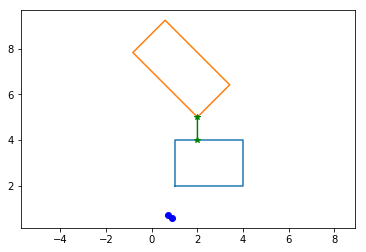

In [69]:
fig, ax = plt.subplots()
rec1.plot(ax)
rec2.plot(ax)
ax.plot(var_init[[0, 2]], var_init[[1, 3]], 'b-o')
ax.plot(sol[[0, 2]], sol[[1, 3]], 'g-*')
ax.axis('equal')
plt.show()